# Análise Exploratória Ozônio

Apresenta-se uma análise exploratória inicial dos dados de concentração horária de O3 (ozônio), na estação da Cidade Universitária (USP), no período entre 19/08/2023 e 19/08/2024.

## Importando Bibliotecas

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## Obtendo os Dados

In [2]:
data = pd.read_csv("../data/ozonio_usp_1_ano.csv", sep=";", skiprows=6)[1:]
data.columns = ["Data", "Hora", "MediaHoraria"]
data['MediaHoraria'] = data['MediaHoraria'].astype(float)
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')

## Análise Superficial Geral dos Dados

In [3]:
data.head()

,Data,Hora,MediaHoraria
1,2023-08-19,01:00,31.0
2,2023-08-19,02:00,37.0
3,2023-08-19,03:00,36.0
4,2023-08-19,04:00,38.0
5,2023-08-19,05:00,36.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 1 to 8808
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          8808 non-null   datetime64[ns]
 1   Hora          8808 non-null   object        
 2   MediaHoraria  7732 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 206.6+ KB


### Analisando a Dispersão dos Valores NaN

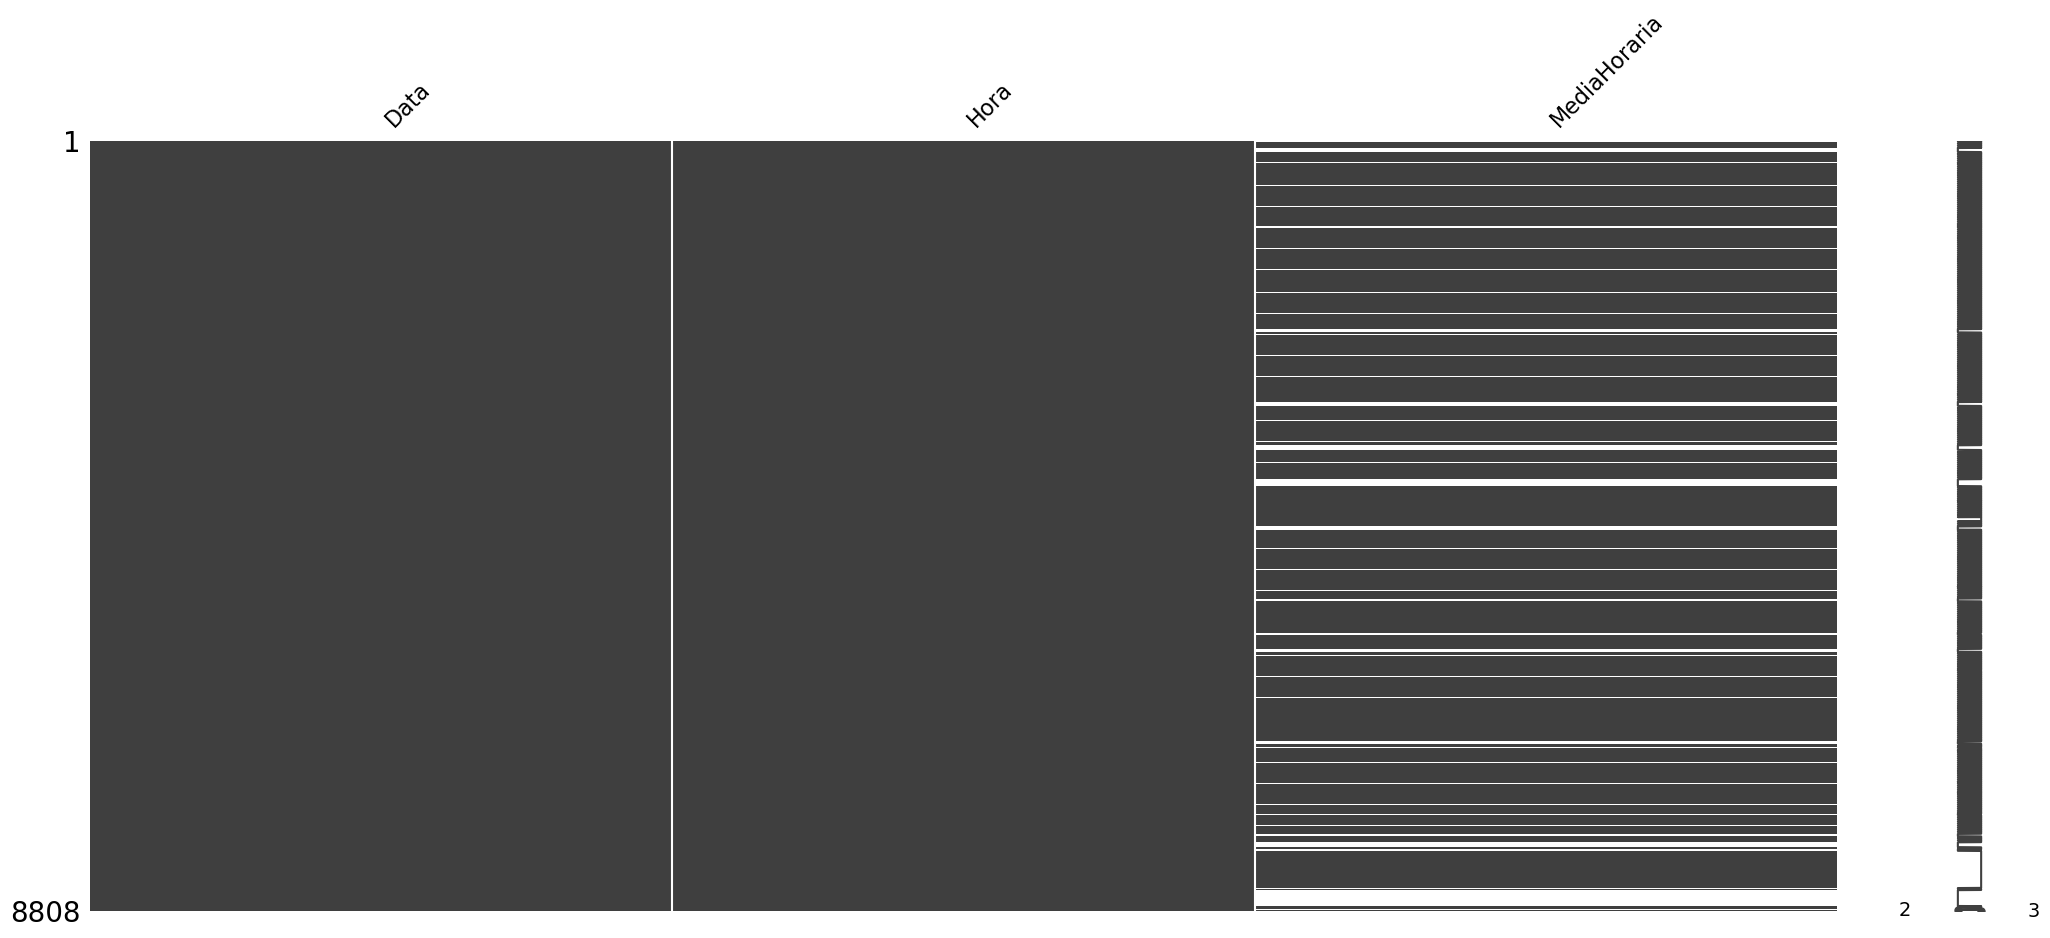

In [5]:
_ = msno.matrix(data)

### Analisando a Distribuição das Concentrações de Ozônio

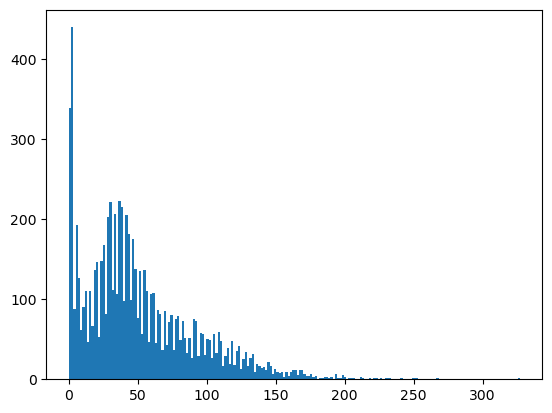

In [6]:
_ = plt.hist(data['MediaHoraria'], bins=200)

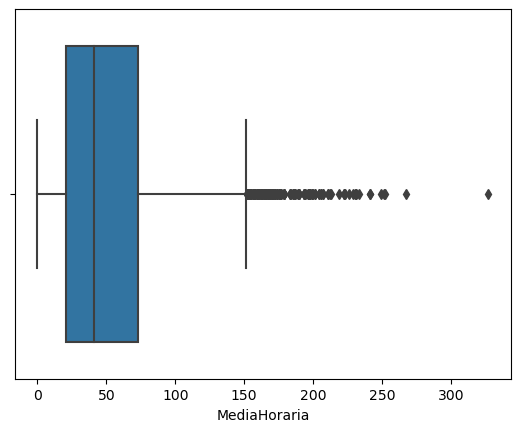

In [7]:
_ = sns.boxplot(x='MediaHoraria', data=data, showfliers=True)

## Analisando a Variação em Função dos Meses

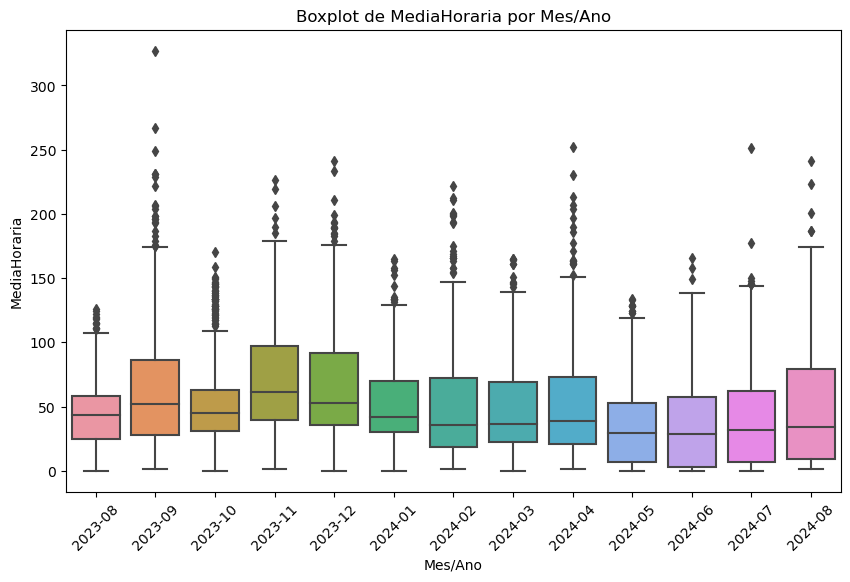

In [8]:
data['Mes/Ano'] = data['Data'].dt.to_period('M')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mes/Ano', y='MediaHoraria', data=data)
plt.title('Boxplot de MediaHoraria por Mes/Ano')
plt.xlabel('Mes/Ano')
plt.ylabel('MediaHoraria')
plt.xticks(rotation=45)
plt.show()

In [9]:
data.groupby('Mes/Ano').agg(
    mean_value=('MediaHoraria', 'mean'),
    std_dev=('MediaHoraria', 'std')
).reset_index()

,Mes/Ano,mean_value,std_dev
0,2023-08,45.687747,30.239542
1,2023-09,62.933140,50.038194
2,2023-10,50.824684,33.130553
3,2023-11,71.167939,44.303056
4,2023-12,65.100000,43.964762
5,2024-01,52.425894,32.860381
6,2024-02,48.423567,41.439977
7,2024-03,47.063142,36.570204
8,2024-04,50.963550,41.928400
9,2024-05,37.321326,35.277571


## Analisando a Variação em Função do Horário

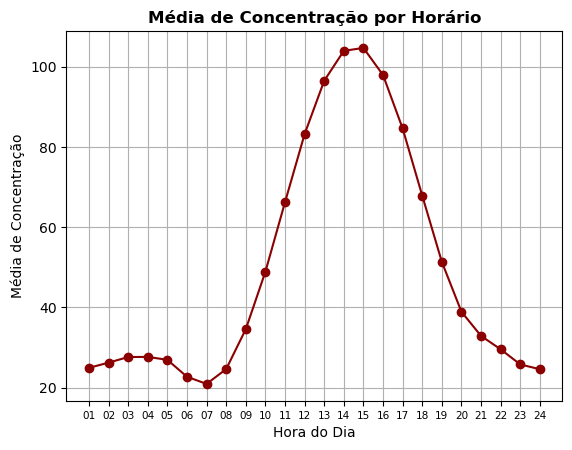

In [10]:
grouped_by_hour = data.groupby("Hora").mean()["MediaHoraria"]
new_index = [(str(i)[:2]) for i in grouped_by_hour.index]

_ = plt.plot(new_index, grouped_by_hour, linestyle='-', color='darkred', marker='o', markersize=6)
plt.xticks(fontsize=7.5)
plt.xlabel("Hora do Dia")
plt.ylabel("Média de Concentração")
plt.title("Média de Concentração por Horário", fontweight='bold')
plt.grid(True)
plt.show()